In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})
import anchor

from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR, MODALITY_TO_CMAP

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'anchor')))

# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


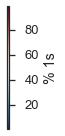

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(1, 2))
cmap = mpl.cm.RdBu_r
norm = mpl.colors.Normalize(vmin=1, vmax=99)
mpl.colorbar.ColorbarBase(ax, cmap=cmap, label='% 1s', norm=norm, ticks=[0, 20, 40, 60, 80, 100])
fig.tight_layout()
fig.savefig('{}/maybe_bimodals_percent_ones_colorbar_cmap.pdf'.format(folder))

In [3]:
bayesian = anchor.BayesianModalities()

## Make test data

### Maybe bimodals

In [4]:
size = 100

data = np.vstack([np.concatenate([np.zeros(size-i), np.ones(i)]) for i in range(1, size)]).T
columns = ['bimodal_{}'.format(str(i).zfill(2)) for i in range(1, data.shape[1]+1)]
maybe_bimodals = pd.DataFrame(data, columns=columns)
maybe_bimodals.head()

,bimodal_01,bimodal_02,bimodal_03,bimodal_04,bimodal_05,bimodal_06,bimodal_07,bimodal_08,bimodal_09,bimodal_10,...,bimodal_90,bimodal_91,bimodal_92,bimodal_93,bimodal_94,bimodal_95,bimodal_96,bimodal_97,bimodal_98,bimodal_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


### Add noise

In [5]:
import six
# Up to but not including the last item - "uncategorized"
# violinplot_kws = dict(order=MODALITY_ORDER[:-1], palette=MODALITY_PALETTE[:-1])

figure_prefix = '{}/maybe_bimodals_noisy'.format(folder)

maybe_bimodals_noisy = anchor.add_noise(
    maybe_bimodals, plot=False, iteration_per_noise=100, #violinplot_kws=violinplot_kws, 
    figure_prefix=figure_prefix, noise_percentages=np.arange(0, 101, 5))
six.print_(maybe_bimodals_noisy.shape)
maybe_bimodals_noisy.head()

(100, 198099)


,bimodal_01_noise0_iter0,bimodal_02_noise0_iter0,bimodal_03_noise0_iter0,bimodal_04_noise0_iter0,bimodal_05_noise0_iter0,bimodal_06_noise0_iter0,bimodal_07_noise0_iter0,bimodal_08_noise0_iter0,bimodal_09_noise0_iter0,bimodal_10_noise0_iter0,...,bimodal_90_noise100_iter99,bimodal_91_noise100_iter99,bimodal_92_noise100_iter99,bimodal_93_noise100_iter99,bimodal_94_noise100_iter99,bimodal_95_noise100_iter99,bimodal_96_noise100_iter99,bimodal_97_noise100_iter99,bimodal_98_noise100_iter99,bimodal_99_noise100_iter99
0,0,0,0,0,0,0,0,0,0,0,...,0.531405,0.577582,0.767717,0.239960,0.964829,0.087456,0.228146,0.963228,0.067367,0.501095
1,0,0,0,0,0,0,0,0,0,0,...,0.497332,0.548632,0.708339,0.082742,0.017272,0.445545,0.742972,0.441497,0.612356,0.933937
2,0,0,0,0,0,0,0,0,0,0,...,0.660236,0.262301,0.107548,0.441836,0.766981,0.296796,0.264926,0.585288,0.938966,0.028357
3,0,0,0,0,0,0,0,0,0,0,...,0.833904,0.833220,0.827848,0.719506,0.496205,0.018356,0.666662,0.658664,0.968084,0.741406
4,0,0,0,0,0,0,0,0,0,0,...,0.879332,0.437631,0.522159,0.154536,0.679571,0.239531,0.402361,0.450550,0.528403,0.408951


### Save the dataa

In [6]:
maybe_bimodals_noisy.to_csv('data.csv'.format(folder))

### Plot a few violinplots from each iteration

In [7]:
tidy = maybe_bimodals_noisy.unstack().reset_index()
six.print_(tidy.shape)
tidy = tidy.rename(columns={'level_0':'Feature ID', 'level_1': "Sample ID", 0: "$\Psi$"})
tidy['Iteration'] = tidy['Feature ID'].str.extract('iter(\d+)').astype(int)
tidy['% Noise'] = tidy['Feature ID'].str.extract('noise(\d+)').astype(int)
tidy['% 1s'] = tidy['Feature ID'].str.extract('_(\d+)_').astype(int)

tidy.head()

(19809900, 3)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,% 1s
0,bimodal_01_noise0_iter0,0,0,0,0,1
1,bimodal_01_noise0_iter0,1,0,0,0,1
2,bimodal_01_noise0_iter0,2,0,0,0,1
3,bimodal_01_noise0_iter0,3,0,0,0,1
4,bimodal_01_noise0_iter0,4,0,0,0,1


In [8]:
metadata = tidy.drop_duplicates(['Feature ID'])
metadata = metadata.set_index('Feature ID')
six.print_(metadata.shape)
metadata.to_csv('metadata.csv', index_col=False)
metadata.head()

(198099, 5)


,Sample ID,$\Psi$,Iteration,% Noise,% 1s
Feature ID,,,,,
bimodal_01_noise0_iter0,0,0,0,0,1
bimodal_02_noise0_iter0,0,0,0,0,2
bimodal_03_noise0_iter0,0,0,0,0,3
bimodal_04_noise0_iter0,0,0,0,0,4
bimodal_05_noise0_iter0,0,0,0,0,5


#### Get only a subset of the samples for plotting

Use where:

* %1s is 1, 25, 50, 75, 99
* Noise percentage is 0, 25, 50, 75

In [9]:
rows = tidy['% 1s'].isin([1, 25, 50, 75, 99]) & tidy['% Noise'].isin([0, 25, 50, 75])

tidy_subset = tidy.loc[rows]
tidy_subset.shape

(150500, 6)

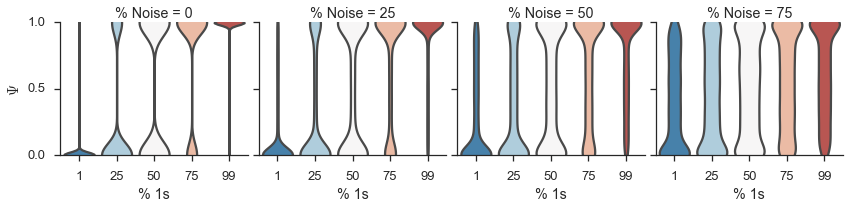

In [10]:
g = sns.factorplot(x='% 1s', y='$\Psi$', col='% Noise', data=tidy_subset, size=3,
                   kind='violin', palette='RdBu_r', bw=0.2, inner=None, scale='width')
g.set(ylim=(0, 1), yticks=(0, 0.5, 1))
g.savefig('{}/data.pdf'.format(folder))

In [11]:
from anchor.simulate import evaluate_estimator

figure_prefix = '{}/maybe_bimodals_evaluated'.format(folder)

bayesian = anchor.BayesianModalities()

result = evaluate_estimator(bayesian, maybe_bimodals_noisy, waypoints, figure_prefix)

NameError: name 'waypoints' is not defined

In [ ]:
bimodals_predicted = result.predicted.reset_index()
bimodals_predicted = bimodals_predicted.rename(columns={'index': "Feature ID"})
bimodals_predicted['Number of Ones'] = bimodals_predicted['Feature ID'].str.split('_').str[1].astype(int) + 1
bimodals_predicted['Original Modality'] = bimodals_predicted['Feature ID'].str.split('_').str[0]
bimodals_predicted['Noise'] = bimodals_predicted['Feature ID'].str.extract('noise(\d+)').astype(int)
bimodals_predicted['Predicted Bimodal'] = bimodals_predicted['Predicted Modality'] == bimodals_predicted['Original Modality']

g = sns.factorplot(x='Number of Ones', y='Predicted Bimodal', 
               data=bimodals_predicted, scale=0.5, color='#262626',
               aspect=1.5, ci=None)
for ax in g.axes.flat:
    ymin, ymax = ax.get_ylim()
    ax.vlines([10, 90], ymin, ymax, linestyle='--')
g.set(xticks=(0, 20, 40, 60, 80, 100), xticklabels=(0, 20, 40, 60, 80, 100), ylim=(ymin, ymax))
g.savefig('{}_bimodals_percent_predicted_bimodal.pdf'.format(figure_prefix))



In [ ]:
g = sns.factorplot(x='Number of Ones', y='Predicted Bimodal', 
               data=bimodals_predicted, scale=0.5, dodge=False,
               aspect=1.5, ci=None, hue='Noise', palette='GnBu_r', hue_order=np.arange(0, 101, 5)[::-1])
g.set(xticks=(0, 20, 40, 60, 80, 100), xticklabels=(0, 20, 40, 60, 80, 100))
g.savefig('{}_bimodals_percent_predicted_bimodal_with_noise.pdf'.format(figure_prefix))

In [ ]:
g = sns.factorplot(x='Noise', y='Predicted Bimodal', 
               data=bimodals_predicted, scale=0.5, dodge=False, legend=False,
               aspect=1.5, ci=None, hue='Number of Ones', palette='RdBu', hue_order=np.arange(1, 100)[::-1])
# g.set(xticks=(0, 20, 40, 60, 80, 100), xticklabels=(0, 20, 40, 60, 80, 100))
g.savefig('{}_bimodals_percent_predicted_bimodal_with_noise.pdf'.format(figure_prefix))

In [ ]:
bimodals_predicted.to_csv('bayesian_modality_predictions.csv', index=False)

In [ ]:
bimodals_predicted.to_csv('bayesian_modality_predictions.csv', index=False)